<a href="https://colab.research.google.com/github/patbolan/MPHY5178_F22/blob/main/Bloch_Simulation/plot_fid_analytical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

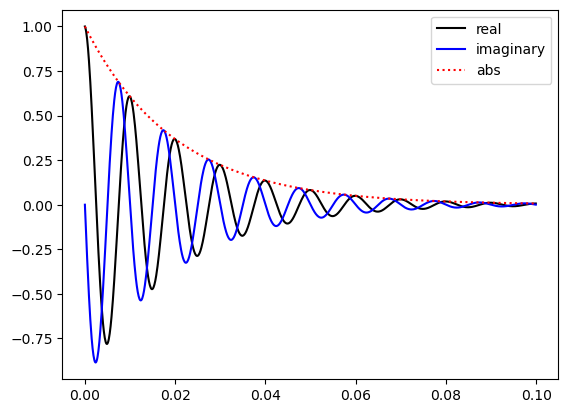

In [1]:
# Plot the analytical expression for a simple FID
import numpy as np
import matplotlib.pyplot as plt

# Consider a 0.5T MR system
f0 = 42.58E6 * 0.5 # 1H Larmor Frequency at 0.5T, Hz
dT = 0.0001 # Sampling period, in seconds
BW = 1/dT # Hz
time_s = np.arange(0, 0.1, dT) # time = 0 --> 100ms 

# Now simulate an exponentially decaying sinusoid
T2 = 0.020 # 20 ms 
S0 = 1 # Initial signal at t=0
offset = 100 # Hz Let it be a little off-resonance

# Signal in rotating frame
s = S0 * np.exp(-time_s / T2) * np.exp(-1j * 2 * np.pi * offset * time_s)

plt.plot(time_s, np.real(s), 'k')
plt.plot(time_s, np.imag(s), 'b')
plt.plot(time_s, np.abs(s), ':r')
plt.legend(['real', 'imaginary','abs'])
plt.show()


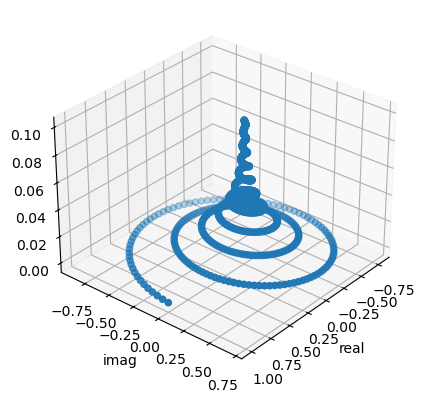

In [2]:
# Not as easy to do a 3D rotatable plot in jupyter. There are ways! But not elegant
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(np.real(s), np.imag(s), time_s)
ax.view_init(elev=30, azim=40, )
plt.xlabel('real')
plt.ylabel('imag')
plt.show()


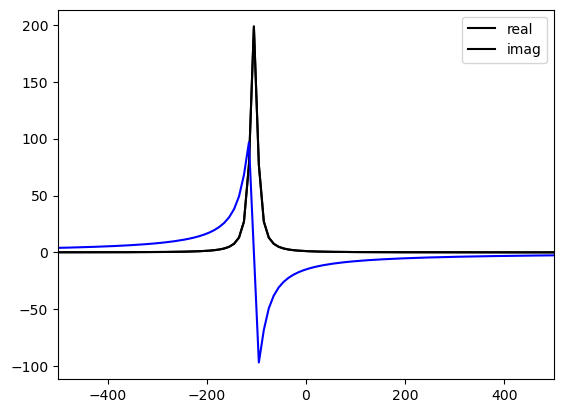

In [3]:
# 1D FT to look at this in frequency domain - a spectrum

# Before a FT we scale the first point of an FID by 1/2. This is a subtle
# effect that is often ignored. (G Otting et al, JMR 66 p187 1986)
s_temp = s
s_temp[0] = s_temp[0] * 0.5
spec = np.fft.fftshift(np.fft.fft(s_temp))

# Calculate frequency axis
SW = 1/dT
Npoints = len(time_s)
dFreq = SW/(Npoints)
freqax = np.arange(-SW/2, SW/2, dFreq) - dFreq/2
plt.plot(freqax,np.real(spec), 'k')

plt.plot(freqax,np.real(spec), 'k')
plt.plot(freqax,np.imag(spec), 'b')
plt.legend(['real', 'imag'])
plt.xlim([-500, 500])
plt.show()